# TP2: Extraction d'information

## Imports and stopwords

In [2]:
from collections import Counter
from IPython.display import Image

# wordcloud and stopwords
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# entities recognition
from collections import defaultdict
import sys
import spacy

from spacy.lang.fr.examples import sentences

# sentiment
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# stopwords (iterative process)
sw = stopwords.words("french")
sw += ["afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"
       
       # sw for all contexts:
       # determiners and pronouns
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abbreviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp", "enfts",

       # miscellanious
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand",

       #//////////////////////////////////////////////////////////////////////////
       
       # sw by specific contexts:
       # meteo and temporality
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "mars", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi",

       # real estate and small ads
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine", "appts",

       # cities and belgian places
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", "laeken", "auderghem", "ostende", "waregem", 

       # job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
       
sw = set(sw)


## Creating a file with the text of an entire year's worth of newspapers

In [4]:
# choosing a specific year
year = 1969

In [5]:
# listing this year's files
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1969-08-14_01-00024.txt',
 'KB_JB838_1969-11-22_01-00033.txt',
 'KB_JB838_1969-02-16_01-00031.txt',
 'KB_JB838_1969-02-27_01-00032.txt',
 'KB_JB838_1969-07-12_01-00020.txt',
 'KB_JB838_1969-04-29_01-00016.txt',
 'KB_JB838_1969-11-04_01-00014.txt',
 'KB_JB838_1969-03-19_01-00003.txt',
 'KB_JB838_1969-11-21_01-00010.txt',
 'KB_JB838_1969-12-09_01-00022.txt',
 'KB_JB838_1969-05-21_01-00026.txt',
 'KB_JB838_1969-02-05_01-00021.txt',
 'KB_JB838_1969-08-02_01-00007.txt',
 'KB_JB838_1969-04-29_01-00007.txt',
 'KB_JB838_1969-07-20_01-00005.txt',
 'KB_JB838_1969-08-21_01-00014.txt',
 'KB_JB838_1969-03-18_01-00014.txt',
 'KB_JB838_1969-05-22_01-00017.txt',
 'KB_JB838_1969-03-28_01-00005.txt',
 'KB_JB838_1969-08-10_01-00017.txt',
 'KB_JB838_1969-02-22_01-00011.txt',
 'KB_JB838_1969-10-28_01-00008.txt',
 'KB_JB838_1969-04-09_01-00026.txt',
 'KB_JB838_1969-04-12_01-00007.txt',
 'KB_JB838_1969-04-02_01-00021.txt',
 'KB_JB838_1969-10-24_01-00026.txt',
 'KB_JB838_1969-05-29_01-00013.txt',
 

In [6]:
# storing the contents of these files in a list
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [7]:
# count the number of files in the list
len(content_list)

100

In [8]:
# print the first 200 characters of the first file content
content_list[0][:200]

'Ets VANDEN BOUDE s.a. *700, chaussée de Mons Anderlectit * Bruxelles 7 demandent : ELECTRICIENS QUALIFIES (installation basse tension) PLOMBIERS . sachant conduire si possible MAGASINIERS (pour dépôt '

In [9]:
# write all content in a temporary file
temp_path = '../tp2'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [10]:
# print the contents of the file and examinate the trash infos
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Ets VANDEN BOUDE s.a. *700, chaussée de Mons Anderlectit * Bruxelles 7 demandent : ELECTRICIENS QUALIFIES (installation basse tension) PLOMBIERS . sachant conduire si possible MAGASINIERS (pour dépôt rue de la Roue) Place stable et d’avenir dans une firme en » continuelle expansion. Bonne rémunération. Prière de s’adresser au « Service du Personnel », av. Doct. Zamenhof - Anderlecht-Veeweyde - Tél. 23.00.80 (poste 34) - Autobus 46 - Trams : A - H - L - Z. 370879 A n « *♦ 44 H 44 44 | H H iî 8 s '

## Cleaning the file with a cleaning function

### Creating the cleaning function

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Applying the function to our file

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../tp2/1969_clean.txt!'

In [13]:
# verifying the result
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'ets vanden boude anderlectit demandent electriciens qualifies installation basse tension plombiers sachant conduire possible magasiniers dépôt roue stable avenir firme continuelle expansion rémunération prière adresser personnel doct zamenhof veeweyde poste autobus trams ets vanderborght frères engagent aides magasiniers préparation commandes bons salaires semaines pension extra légale gratuite personnel fossé loups ateliers ruisbroek decolleteur revolver aide verificateur tourneurs manœuvres ma'

## Wordcloud

### Displaying the most frequent terms


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('premier', 205), ('partir', 172), ('division', 166), ('importante', 165), ('firme', 161), ('grande', 161), ('partie', 160), ('première', 160), ('aide', 159), ('société', 159)]


### Creating, storing and displaying the wordcloud

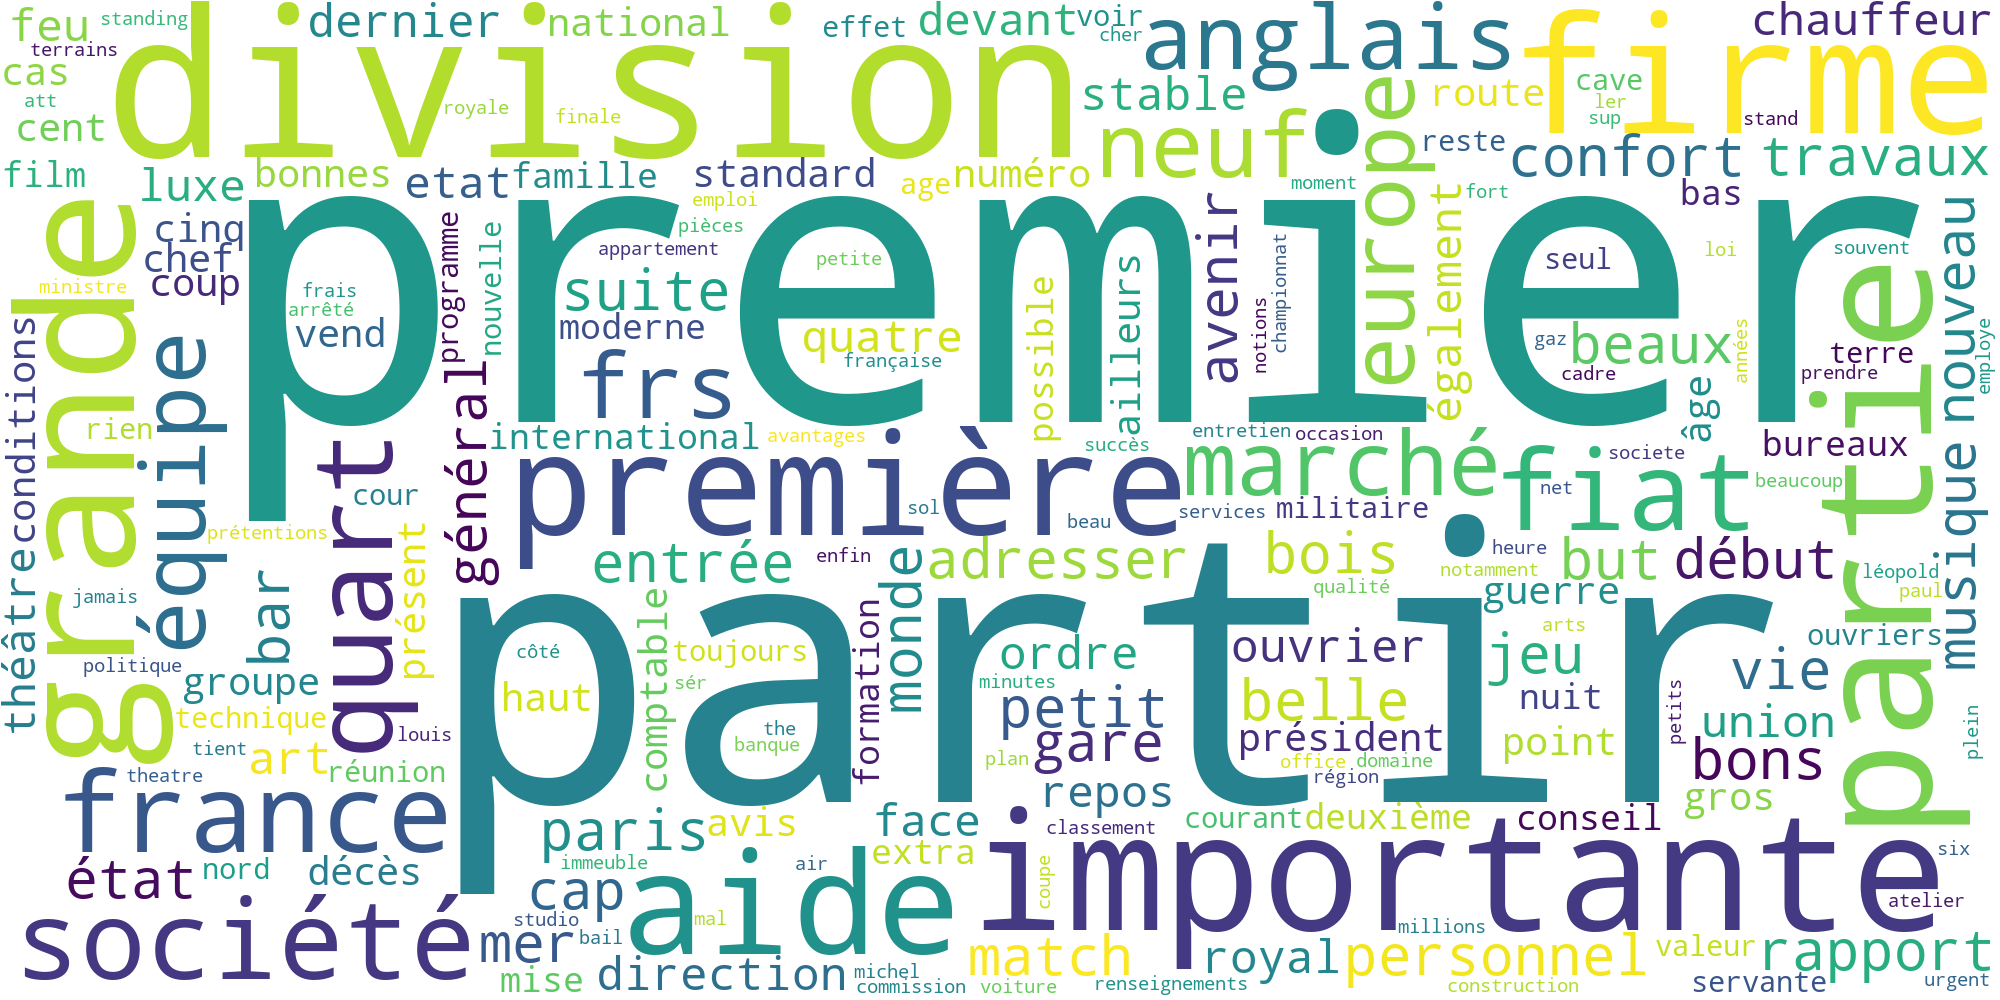

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Applying named entity recognition to the file

In [16]:
nlp = spacy.load('fr_core_news_md')

In [17]:
# charging the textCharger le texte
n=1000000
text = open("../tp2/1969_clean.txt", encoding='utf-8').read()[:n]

In [18]:
%%time
# treating the text

doc = nlp(text)

CPU times: user 31.1 s, sys: 1.14 s, total: 32.2 s
Wall time: 32.4 s


In [19]:
# counting the entities
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [20]:
# sort and print

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:10]:
    print(f" {person} apparaît {freq} fois dans le corpus de l'année {year}")

for location, freq in sorted_location[:10]:
    print(f" {location} apparaît {freq} fois dans le corpus de l'année {year}")

for organisation, freq in sorted_organisation[:10]:
    print(f" {organisation} apparaît {freq} fois dans le corpus de l'année {year}")

 paula apparaît 16 fois dans le corpus de l'année 1969
 général gaulle apparaît 15 fois dans le corpus de l'année 1969
 jeremy apparaît 14 fois dans le corpus de l'année 1969
 atel apparaît 13 fois dans le corpus de l'année 1969
 martin apparaît 11 fois dans le corpus de l'année 1969
 beerschot apparaît 10 fois dans le corpus de l'année 1969
 guimard apparaît 10 fois dans le corpus de l'année 1969
 eddy merckx apparaît 7 fois dans le corpus de l'année 1969
 léon frédéricq apparaît 6 fois dans le corpus de l'année 1969
 bradley apparaît 6 fois dans le corpus de l'année 1969
 paris apparaît 46 fois dans le corpus de l'année 1969
 europe apparaît 44 fois dans le corpus de l'année 1969
 france apparaît 40 fois dans le corpus de l'année 1969
 espagne apparaît 19 fois dans le corpus de l'année 1969
 allemagne apparaît 18 fois dans le corpus de l'année 1969
 italie apparaît 17 fois dans le corpus de l'année 1969
 londres apparaît 15 fois dans le corpus de l'année 1969
 angleterre apparaît 15 

# Sentiment analysis

## Creating function

In [21]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Choosing sentences

In [22]:
get_sentiment("Nous offrons : - Bonne rémunération. - Avenir assuré. ")
get_sentiment("Sommes à la recherche d’une excellente sténo-dactylo ayant une orthographe française parfaite.")
get_sentiment("Chaque correction à votre silhouette est désormais possible dans l’institut spécialisé le plus moderne d’Europe.")
get_sentiment("Bogaert et André redressèrent la situation et Claes donna la victoire à Cuesmes.")
get_sentiment("C'est une sorte de satisfaction de l'estomac")
get_sentiment("Cette vedette, adulée, célèbre, que le monde du cinéma enviait, éprouvait un amour profond, passionné — et il n’était pas partagé, pensait Aria.")
get_sentiment("Le sable du Mexique boit le sang comme de l’eau.")
get_sentiment("L’orateur conclut en exprimant son inquiétude devant « la politique désordonnée et incohérente » que mene le gouvernement, politique dont on peut attendre des craintes serieuses pour l’avenir.")
get_sentiment("Belle tactique défensive !")
get_sentiment("Il va de soi que les chaussées mal inclinées ou mal revêtues, notamment, sont dangereuses.")

This text is 45% positive and 0.44999999999999996% subjective.
This text is 50% positive and 0.5666666666666668% subjective.
This text is 13% positive and 0.215% subjective.
This text is neutral and perfectly objective.
This text is neutral and perfectly objective.
This text is 40% positive and 0.5666666666666668% subjective.
This text is neutral and perfectly objective.
This text is 15% positive and 0.18333333333333335% subjective.
This text is 100% positive and 0.8% subjective.
This text is 65% negative and 0.6666666666666666% subjective.
